Преобразовать изображение из arr в HSV. Добавить возможность изменять значения оттенка, насыщенности и яркости. Результат сохранять в файл, предварительно преобразовав обратно.

Пушкова

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)
filename = 'task3_image'
img = Image.open(filename+'.jpg')
img = img.convert("RGB")
arr = np.array(img)/255
arr

array([[[0.62745098, 0.76078431, 0.94901961],
        [0.63137255, 0.76470588, 0.95294118],
        [0.63529412, 0.76862745, 0.95686275],
        ...,
        [0.59607843, 0.69019608, 0.82352941],
        [0.58431373, 0.68235294, 0.80392157],
        [0.57647059, 0.6745098 , 0.79607843]],

       [[0.63137255, 0.76470588, 0.95294118],
        [0.63137255, 0.76470588, 0.95294118],
        [0.63529412, 0.76862745, 0.95686275],
        ...,
        [0.58823529, 0.68235294, 0.81568627],
        [0.57647059, 0.67058824, 0.80392157],
        [0.57254902, 0.67058824, 0.79215686]],

       [[0.63137255, 0.76470588, 0.95294118],
        [0.63137255, 0.76470588, 0.95294118],
        [0.63529412, 0.76862745, 0.95686275],
        ...,
        [0.56862745, 0.6627451 , 0.79607843],
        [0.56470588, 0.65882353, 0.79215686],
        [0.55686275, 0.65098039, 0.78431373]],

       ...,

       [[0.21176471, 0.22745098, 0.12941176],
        [0.08627451, 0.09411765, 0.        ],
        [0.14901961, 0

(np.float64(-0.5), np.float64(1279.5), np.float64(960.5), np.float64(-0.5))

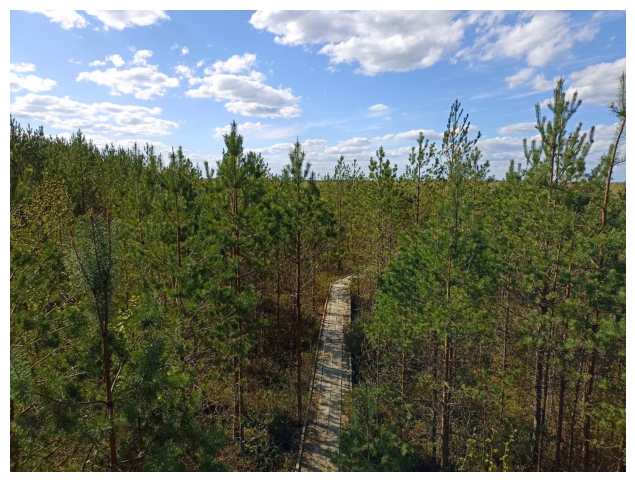

In [29]:
plt.imshow(img)
plt.axis('off')

In [30]:
max_val = np.amax(arr, axis=2)
max_channel = np.argmax(arr, axis=2)
min_val = np.amin(arr, axis=2)
min_channel = np.argmin(arr, axis=2)

hsv = np.zeros(arr.shape, dtype='float')
#H
hsv[max_channel == min_channel, 0] = np.zeros(hsv[max_channel == min_channel, 0].shape)
#r max
hsv[max_channel == 0, 0] = (((arr[..., 1] - arr[..., 2]) * 60.0 / (max_val - min_val + np.spacing(1))) % 360.0)[max_channel == 0]
#g max
hsv[max_channel == 1, 0] = (((arr[..., 2] - arr[..., 0]) * 60.0 / (max_val - min_val + np.spacing(1))) + 120.0)[max_channel == 1]
#b max
hsv[max_channel == 2, 0] = (((arr[..., 0] - arr[..., 1]) * 60.0 / (max_val - min_val + np.spacing(1))) + 240.0)[max_channel == 2]
#S
hsv[max_val == 0, 1] = np.zeros(hsv[max_val == 0, 1].shape)
hsv[max_val != 0, 1] = (1 - min_val / (max_val + np.spacing(1)))[max_val != 0]
#V
hsv[..., 2] = max_val

In [ ]:

from ipywidgets import interact, IntSlider, Button

def hsv_to_rgb(h,s,v):
    #todo
    mod_hsv = hsv.copy()
    mod_hsv[...,0] = (mod_hsv[...,0] + h)%360
    mod_hsv[...,1] = mod_hsv[...,1] * s/100
    mod_hsv[..., 1] = np.clip(mod_hsv[..., 1], 0, 1)
    mod_hsv[...,2] = mod_hsv[...,2] * v/100
    mod_hsv[..., 2] = np.clip(mod_hsv[..., 2], 0, 1)


    hi = np.floor(mod_hsv[..., 0] / 60.0) % 6    
    c = mod_hsv[..., 1] * mod_hsv[..., 2]
    x = c * (1 - np.abs((mod_hsv[..., 0] / 60.0) % 2 - 1))
    rgb = np.zeros(mod_hsv.shape)
    rgb[hi == 0, :] = np.dstack((c,x,np.zeros(x.shape)))[hi == 0, :]
    rgb[hi == 1, :] = np.dstack((x,c,np.zeros(x.shape)))[hi == 1, :]
    rgb[hi == 2, :] = np.dstack((np.zeros(x.shape), c,x))[hi == 2, :]
    rgb[hi == 3, :] = np.dstack((np.zeros(x.shape),x,c))[hi == 3, :]
    rgb[hi == 4, :] = np.dstack((x,np.zeros(x.shape),c))[hi == 4, :]
    rgb[hi == 5, :] = np.dstack((c,np.zeros(x.shape),x))[hi == 5, :]

    rgb = (rgb + (mod_hsv[..., 2] - c)[:, :, np.newaxis])*255
    new_img = Image.fromarray(rgb.astype(np.uint8))

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(new_img)
    axes[0].set_title("Modified")
    axes[0].axis("off")

    axes[1].imshow(img)
    axes[1].set_title("Original")
    axes[1].axis("off")
    new_img.save(filename+'_new.jpg')
    plt.show()

# Создаем интерактивное взаимодействие
interact(hsv_to_rgb,
         h=IntSlider(min=0, max=360, step=1, value=0), 
         s=IntSlider(min=0, max=100, step=1, value=100), 
         v=IntSlider(min=0, max=100, step=1, value=100)  
        );


interactive(children=(IntSlider(value=0, description='h', max=360), IntSlider(value=100, description='s'), Int…